In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze segment-wise correlations

In [61]:
# load data 
# ALL: correlation of all segments (acceleration or decceleration capacity) with the corresponding segments of the vg metric
# AC: correlating only acceleration capacity
# DC: correlating only decceleration capacity

path = "/home/jemrich/vg_graph_metrics/correlation_segmentwise.csv"
df = pd.read_csv(path)
# remove nan
df = df.dropna(axis=0, how='any', subset=["ALL", "AC", "DC"])
df = df.drop_duplicates()
df

,record,metric,ALL,AC,DC,beats_per_window,edge_weight,direction,freq_domain
0,3QPGYYQXVM_Myo,minimum_cut_value_left_to_right,-0.038462,-0.045299,-0.025237,4,NaN,NaN,False
1,3QPGYYQXVM_Myo,maximum_flow_value_left_to_right,-0.038462,-0.045299,-0.025237,4,NaN,NaN,False
2,3QPGYYQXVM_Myo,shortest_path_length_left_to_right,0.022691,0.027041,0.057185,4,NaN,NaN,False
3,3QPGYYQXVM_Myo,minimum_cut_value_left_to_right,-0.038462,-0.045299,-0.025237,4,NaN,left_to_right,False
4,3QPGYYQXVM_Myo,maximum_flow_value_left_to_right,-0.038462,-0.045299,-0.025237,4,NaN,left_to_right,False
...,...,...,...,...,...,...,...,...,...
33895,55XUM543B6_Myo,dag_longest_path_length,-0.143684,-0.262716,-0.068842,32,v_distance,left_to_right,False
33896,34ASQ92JK5_Myo,minimum_cut_value_left_to_right,0.004208,0.005146,0.002538,32,v_distance,left_to_right,False
33897,34ASQ92JK5_Myo,maximum_flow_value_left_to_right,0.004208,0.005146,0.002538,32,v_distance,left_to_right,False
33898,34ASQ92JK5_Myo,shortest_path_length_left_to_right,0.012599,-0.008463,0.027611,32,v_distance,left_to_right,False


In [62]:
# create column with largest correlation
df['max'] = df[['ALL', 'AC', 'DC']].abs().max(axis=1)
# sort by correlation
df.sort_values(by=["ALL", "AC", "DC", "metric"], ascending=False).head(10)

,record,metric,ALL,AC,DC,beats_per_window,edge_weight,direction,freq_domain,max
26,3QPGYYQXVM_Myo,shortest_path_length_left_to_right,1.000000,1.000000,0.999751,4,v_distance,left_to_right,False,1.0
16399,0FBIQ4IN69_Myo,shortest_path_length_left_to_right,1.000000,0.995010,1.000000,4,v_distance,left_to_right,False,1.0
12,3QPGYYQXVM_Myo,shortest_path_length_left_to_right,0.999999,1.000000,0.970485,4,slope,left_to_right,False,1.0
16318,0FBIQ4IN69_Myo,dag_longest_path_length,0.999993,0.099627,1.000000,4,slope,left_to_right,False,1.0
16400,0FBIQ4IN69_Myo,dag_longest_path_length,0.999993,0.099627,1.000000,4,v_distance,left_to_right,False,1.0
16275,0FBIQ4IN69_Myo,minimum_cut_value_left_to_right,0.999993,0.111495,1.000000,4,slope,NaN,False,1.0
16315,0FBIQ4IN69_Myo,minimum_cut_value_left_to_right,0.999993,0.111495,1.000000,4,slope,left_to_right,False,1.0
16276,0FBIQ4IN69_Myo,maximum_flow_value_left_to_right,0.999993,0.111495,1.000000,4,slope,NaN,False,1.0
16316,0FBIQ4IN69_Myo,maximum_flow_value_left_to_right,0.999993,0.111495,1.000000,4,slope,left_to_right,False,1.0
16397,0FBIQ4IN69_Myo,minimum_cut_value_left_to_right,0.999993,0.105222,1.000000,4,v_distance,left_to_right,False,1.0


In [63]:
df_stack = df.set_index(['metric', 'beats_per_window', 'edge_weight', 'direction', 'freq_domain', 'record'])
df_stack = df_stack.stack()
df_stack = df_stack.reset_index()
df_stack = df_stack.rename(columns={'level_6': 'type', 0: 'correlation'}) 
df0 = df_stack.set_index(['metric', 'beats_per_window', 'edge_weight', 'direction', 'freq_domain'])
df0.index = df0.index.map(str)
df0.index.name = "index"
df0 = df0[df0['type'].isin(['AC', 'DC'])]
df0 = df0.sort_values(by=['correlation'], ascending=False)
df0

,record,type,correlation
index,,,
"('shortest_path_length_left_to_right', 4, 'v_distance', 'left_to_right', False)",3QPGYYQXVM_Myo,AC,1.000000
"('shortest_path_length_left_to_right', 4, 'v_distance', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,1.000000
"('dag_longest_path_length', 4, 'slope', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,1.000000
"('dag_longest_path_length', 4, 'v_distance', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,1.000000
"('minimum_cut_value_left_to_right', 4, 'v_distance', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,1.000000
...,...,...,...
"('minimum_cut_value_left_to_right', 4, 'sq_distance', 'left_to_right', False)",3QPGYYQXVM_Myo,AC,-0.999996
"('maximum_flow_value_left_to_right', 4, 'sq_distance', 'left_to_right', False)",3QPGYYQXVM_Myo,AC,-0.999996
"('dag_longest_path_length', 4, 'sq_distance', 'left_to_right', False)",3QPGYYQXVM_Myo,AC,-0.999996


In [64]:
# group by metric / calculate median over all records + select if magnitude of correclation is > 0.5
sorted = df0.groupby(by=[df0.index, 'type'])['correlation'].agg(['median', 'mean', 'std', 'count'])
sorted = sorted[abs(sorted['median'])>0.5].sort_values(by=['median'], ascending=False, key=abs)
sorted.head(10)

median      mean  \
index                                              type                       
('shortest_path_length_left_to_right', 4, 'v_di... DC    0.985556  0.982341   
                                                   AC    0.984990  0.981116   
('shortest_path_length_left_to_right', 4, 'slop... AC    0.950260  0.950320   
                                                   DC    0.908764  0.907637   
('dag_longest_path_length', 4, 'slope', 'left_t... DC    0.692429  0.662446   
('dag_longest_path_length', 4, 'v_distance', 'l... DC    0.692429  0.662446   
('shortest_path_length_left_to_right', 4, 'angl... AC    0.572583  0.552950   
('minimum_cut_value_left_to_right', 4, 'slope',... DC    0.563985  0.551146   
('minimum_cut_value_left_to_right', 4, 'slope',... DC    0.563985  0.551146   
('maximum_flow_value_left_to_right', 4, 'slope'... DC    0.563985  0.551146   

                                                              std  count  
index                                              type                   
('shortest_path_length_left_to_right', 4, 'v_di... DC    0.014966    300  
                                                   AC    0.015992    300  
('shortest_path_length_left_to_right', 4, 'slop... AC    0.025035    300  
                                                   DC    0.046856    300  
('dag_longest_path_length', 4, 'slope', 'left_t... DC    0.168284    300  
('dag_longest_path_length', 4, 'v_distance', 'l... DC    0.168284    300  
('shortest_path_length_left_to_right', 4, 'angl... AC    0.165020    300  
('minimum_cut_value_left_to_right', 4, 'slope',... DC    0.148403    300  
('minimum_cut_value_left_to_right', 4, 'slope',... DC    0.148403    300  
('maximum_flow_value_left_to_right', 4, 'slope'... DC    0.148403    300

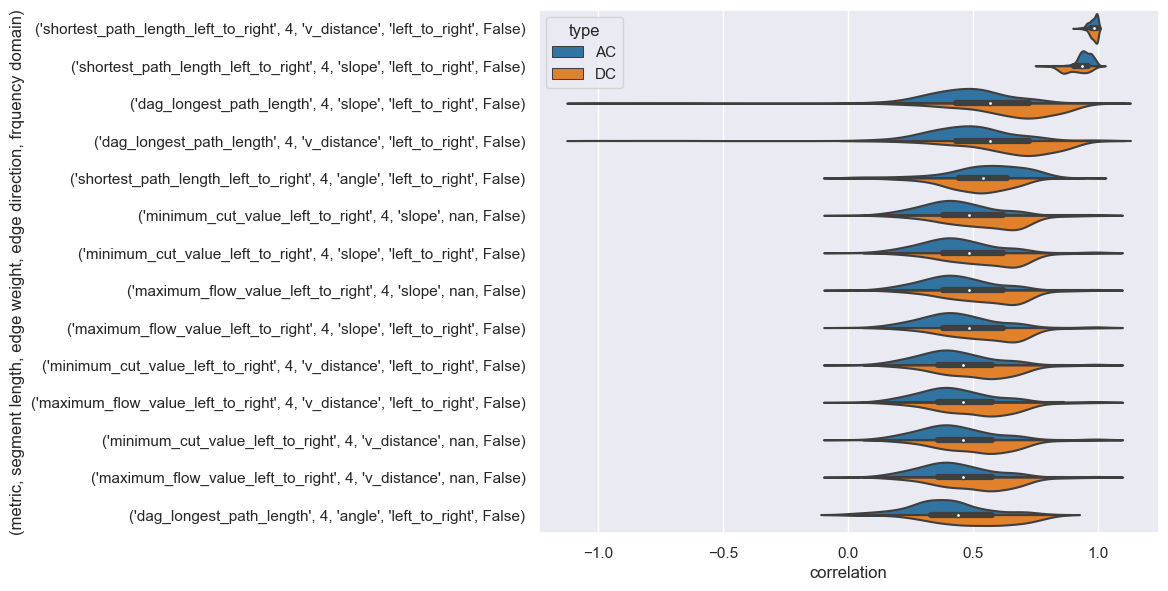

In [66]:
sns.set(rc={'figure.figsize':(8,0.4*len(sorted))})
sns.set_palette(sns.color_palette("tab10"))
ax = sns.violinplot(data=df0, y=df0.index, x="correlation", hue="type", split=True, order=sorted.index.get_level_values(0).drop_duplicates())
ax.set(xlabel='correlation', ylabel="(metric, segment length, edge weight, edge direction, frequency domain)")
ax.figure.savefig("plots/best_segmentwise_correlation.png")

# Analyze Different Window Lengths

In [18]:
df_bpw = df_stack.set_index(['edge_weight', 'direction', 'freq_domain'])
df_bpw.index = df_bpw.index.map(str)
df_bpw.index.name = "index"
df_bpw

,metric,beats_per_window,record,type,correlation
index,,,,,
"('slope', 'left_to_right', False)",minimum_cut_value_left_to_right,4,3QPGYYQXVM_Myo,ALL,0.003834
"('slope', 'left_to_right', False)",minimum_cut_value_left_to_right,4,3QPGYYQXVM_Myo,AC,0.003645
"('slope', 'left_to_right', False)",minimum_cut_value_left_to_right,4,3QPGYYQXVM_Myo,DC,0.343285
"('slope', 'left_to_right', False)",minimum_cut_value_left_to_right,4,3QPGYYQXVM_Myo,max,0.343285
"('slope', 'left_to_right', False)",maximum_flow_value_left_to_right,4,3QPGYYQXVM_Myo,ALL,0.003834
...,...,...,...,...,...
"('v_distance', 'left_to_right', False)",shortest_path_length_left_to_right,32,34ASQ92JK5_Myo,max,0.027611
"('v_distance', 'left_to_right', False)",dag_longest_path_length,32,34ASQ92JK5_Myo,ALL,-0.152807
"('v_distance', 'left_to_right', False)",dag_longest_path_length,32,34ASQ92JK5_Myo,AC,-0.291432


In [19]:
df_bpw_sorted = df_bpw.groupby(by=[df_bpw.index, 'beats_per_window','type'])['correlation'].agg(['median', 'mean', 'std', 'count'])
df_bpw_sorted = df_bpw_sorted[abs(df_bpw_sorted['median'])>0.5].sort_values(by=['median'], ascending=False, key=abs)
df_bpw_sorted.head(10)

median  \
index                                  beats_per_window type             
('slope', 'left_to_right', False)      4                max   0.684064   
                                                        DC    0.671321   
('v_distance', 'left_to_right', False) 4                max   0.664065   
                                                        DC    0.650279   
('slope', 'left_to_right', False)      4                ALL   0.597650   
('v_distance', 'left_to_right', False) 4                ALL   0.579772   
('angle', 'left_to_right', False)      4                max   0.517662   
('slope', 'left_to_right', False)      4                AC    0.501994   

                                                                  mean  \
index                                  beats_per_window type             
('slope', 'left_to_right', False)      4                max   0.695839   
                                                        DC    0.668094   
('v_distance', 'left_to_right', False) 4                max   0.689878   
                                                        DC    0.671924   
('slope', 'left_to_right', False)      4                ALL   0.627741   
('v_distance', 'left_to_right', False) 4                ALL   0.628993   
('angle', 'left_to_right', False)      4                max   0.509849   
('slope', 'left_to_right', False)      4                AC    0.572230   

                                                                   std  count  
index                                  beats_per_window type                   
('slope', 'left_to_right', False)      4                max   0.202771   1200  
                                                        DC    0.199507   1200  
('v_distance', 'left_to_right', False) 4                max   0.222876   1200  
                                                        DC    0.231555   1200  
('slope', 'left_to_right', False)      4                ALL   0.223051   1200  
('v_distance', 'left_to_right', False) 4                ALL   0.246475   1200  
('angle', 'left_to_right', False)      4                max   0.158025   1200  
('slope', 'left_to_right', False)      4                AC    0.266556   1200

In [20]:
sns.set(rc={'figure.figsize':(15,40)})
sns.set_palette(sns.color_palette("tab10"))
ax = sns.relplot(df_bpw, x='beats_per_window', y='correlation', hue='index', style="type", col="metric", col_wrap=2, kind="line")
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

/home/jemrich/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


: 

: 

# Analyze Aggregate Correlations

In [67]:
path = "/home/jemrich/vg_graph_metrics/capacity_values_agg.csv"
df = pd.read_csv(path)
# remove nan
df = df.dropna(axis=0, how='any', subset=["AC", "DC"])
df = df.drop_duplicates()
df = df.set_index("record")
# get AC and DC
AC = df[df.metric=="standard"].AC
DC = df[df.metric=="standard"].DC
df = df[df.metric!="standard"]
df

,metric,AC,DC,beats_per_window,edge_weight,direction,freq_domain
record,,,,,,,
3QPGYYQXVM_Myo,shortest_path_length_left_to_right_mean,-478.693717,-7.043074,4.0,v_distance,left_to_right,False
3QPGYYQXVM_Myo,shortest_path_length_left_to_right_median,0.000000,-1.000000,4.0,v_distance,left_to_right,False
3QIXI1KT4E_-,shortest_path_length_left_to_right_mean,-3.369304,4.557233,4.0,v_distance,left_to_right,False
3QIXI1KT4E_-,shortest_path_length_left_to_right_median,-2.000000,3.000000,4.0,v_distance,left_to_right,False
1LQJVQ84PB_Myo,shortest_path_length_left_to_right_mean,-2.062762,-2.994068,4.0,v_distance,left_to_right,False
...,...,...,...,...,...,...,...
5N94TIV1AF_-,shortest_path_length_left_to_right_skip_outlie...,-1.000000,1.000000,4.0,v_distance,left_to_right,False
55XUM543B6_Myo,shortest_path_length_left_to_right_skip_outlie...,-4.634537,3.252534,4.0,v_distance,left_to_right,False
55XUM543B6_Myo,shortest_path_length_left_to_right_skip_outlie...,-3.000000,4.000000,4.0,v_distance,left_to_right,False


In [68]:
df_corr = df.set_index(["metric", "beats_per_window", "edge_weight", "direction", "freq_domain"], append=True)
df_corr = df_corr.unstack(level=[1,2,3,4,5])
"AC", df_corr.corrwith(AC).loc["AC"], "DC",df_corr.corrwith(DC).loc["DC"]

('AC',
 metric                                                  beats_per_window  edge_weight  direction      freq_domain
 shortest_path_length_left_to_right_mean                 4.0               v_distance   left_to_right  False          0.999120
 shortest_path_length_left_to_right_median               4.0               v_distance   left_to_right  False          0.011136
 shortest_path_length_left_to_right_outl_mean            4.0               v_distance   left_to_right  False         -0.345363
 shortest_path_length_left_to_right_outl_median          4.0               v_distance   left_to_right  False         -0.047587
 shortest_path_length_left_to_right_skip_outlier_mean    4.0               v_distance   left_to_right  False          0.998842
 shortest_path_length_left_to_right_skip_outlier_median  4.0               v_distance   left_to_right  False          0.046803
 dtype: float64,
 'DC',
 metric                                                  beats_per_window  edge_weight  dire